# Mixture Density Network Example

Original Paper: https://publications.aston.ac.uk/id/eprint/373/1/NCRG_94_004.pdf

Reference: https://github.com/hardmaru/pytorch_notebooks/blob/master/mixture_density_networks.ipynb

See `./src/mdn.py` for the actual implementation of the Mixture Density Network model.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt

from src import MixtureDensityNetwork

from typing import List

In [2]:
NUM_GAUSSIANS = 4
LAYERS = [1, 32]
LEARNING_RATE = 1e-2
OUTPUT_DIM = 2

In [3]:
def plot3d(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=y+z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

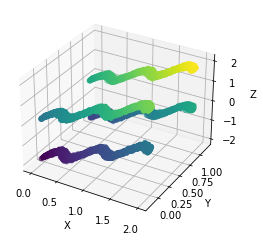

In [4]:
# Generate 3D Training Data
x = torch.linspace(0, 2, 10000)
y = torch.linspace(0, 16, 10000).sin()/10 + torch.randint(0, 2, (10000,)) + torch.randn(10000)/40
z = x + 2*torch.randint(0, 2, (10000,)) - 2 + torch.rand(10000)/40

plot3d(x, y, z)

In [5]:
model = MixtureDensityNetwork(LAYERS, NUM_GAUSSIANS, OUTPUT_DIM)
opt = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [6]:
inputs = x.unsqueeze(-1)
targs = torch.cat([y.unsqueeze(-1), z.unsqueeze(-1)], dim=1)

In [7]:
for epoch_idx in range(10_000):
    means, variances, weights = model(inputs)
    
    opt.zero_grad()
    loss = model.loss_func(targs, means, variances, weights)
    loss.backward()
    opt.step()

    for p in model.parameters():
        if torch.isnan(p).any():
            1/0
    
    if (epoch_idx + 1) % 250 == 0:
        print(f"Epoch {epoch_idx+1} Loss: {loss.item():8.4f}")

Epoch 250 Loss:  -1.7908
Epoch 500 Loss:  -1.8502
Epoch 750 Loss:  -1.8907
Epoch 1000 Loss:  -1.9029
Epoch 1250 Loss:  -1.9267
Epoch 1500 Loss:  -2.0095
Epoch 1750 Loss:  -2.1424
Epoch 2000 Loss:  -2.3502
Epoch 2250 Loss:  -2.4811
Epoch 2500 Loss:  -2.6059
Epoch 2750 Loss:  -2.6619
Epoch 3000 Loss:  -2.4320
Epoch 3250 Loss:  -2.7429
Epoch 3500 Loss:  -2.8861
Epoch 3750 Loss:  -2.8318
Epoch 4000 Loss:  -2.9714
Epoch 4250 Loss:  -3.0021
Epoch 4500 Loss:  -2.9997
Epoch 4750 Loss:  -2.9945
Epoch 5000 Loss:  -3.0296
Epoch 5250 Loss:  -3.0484
Epoch 5500 Loss:  -3.0938
Epoch 5750 Loss:  -3.1133
Epoch 6000 Loss:  -3.0863
Epoch 6250 Loss:  -3.1272
Epoch 6500 Loss:  -3.1434
Epoch 6750 Loss:  -3.1515
Epoch 7000 Loss:  -3.1713
Epoch 7250 Loss:  -3.1762
Epoch 7500 Loss:  -3.1923
Epoch 7750 Loss:  -3.1561
Epoch 8000 Loss:  -3.2122
Epoch 8250 Loss:  -3.2229
Epoch 8500 Loss:  -3.1950
Epoch 8750 Loss:  -3.0831
Epoch 9000 Loss:  -3.2389
Epoch 9250 Loss:  -3.2519
Epoch 9500 Loss:  -3.2649
Epoch 9750 Loss

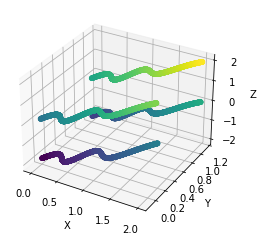

In [8]:
with torch.no_grad():
    means, _, weights = model(inputs)

idxs = Categorical(probs=weights).sample()
idxs = idxs.unsqueeze(-1)
idxs = torch.stack([idxs, idxs], dim=-1)
preds = means.gather(1, idxs)

y_pred = preds.squeeze(1)[:, 0]
z_pred = preds.squeeze(1)[:, 1]

plot3d(x, y_pred, z_pred)